# <center> Breast Cancer Detection </center>

## Aim

The aim of this research is to predict the intensity of the cancer nased ons given medical parameters. 

## Importing the libraries

In [302]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import time
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing models and creating modelling funcions

In [303]:
from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Imported Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
display(classifiers)
print('\nAll Models Imported')

,Classifier,Imported as
0,Imported Multi Layer Perceptron,mlp
1,Bagging,bc
2,Gradient Boosting,gbc
3,Ada Boost,ada
4,XG Boost,xgb
5,Logistic Regression,lr
6,Random Forest,rfc
7,k Nearest Neighbours,knn
8,Support Vector Machine,svc
9,SVM tuning grid,grid



All Models Imported


In [304]:
def Modelling(X_train,Y_train,X_test,Y_test,models):
    model_acc = []
    model_time=[]
    for i in models:
        start=time.time()
        if i == 'knn':
            accuracy = []
            for j in range(1,40):    
                kn = KNeighborsClassifier(n_neighbors=j)
                kn.fit(X_train,Y_train)
                predK = kn.predict(X_test)
                accuracy.append([accuracy_score(Y_test,predK),j])
            temp = accuracy[0]
            for m in accuracy:
                if temp[0] < m[0]:
                    temp=m
            i = KNeighborsClassifier(n_neighbors=temp[1])
        i.fit(X_train,Y_train)
        model_acc.append(accuracy_score(Y_test,i.predict(X_test)))
        stop=time.time()
        model_time.append((stop-start))
        print(i,'has been fit')
    models_output = pd.DataFrame({'Models':models,'Accuracy':model_acc,'Runtime (s)':model_time})
    return(models_output)

# Importing the data

In [305]:
data = pd.read_csv('data.csv')

In [306]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Setting id as index and dropping Unnamed column

In [307]:
data=data.set_index('id').drop('Unnamed: 32',axis=1)

## EDA

In [308]:
data.shape

(569, 31)

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

<AxesSubplot:ylabel='id'>

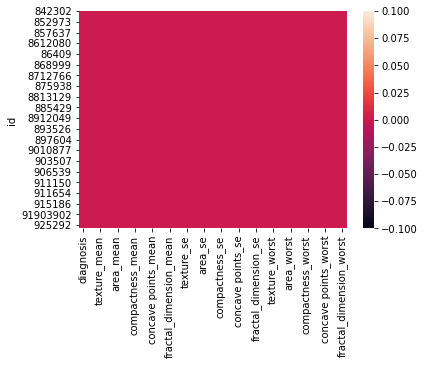

In [310]:
sns.heatmap(data.isnull())

Now we know that we dont have any null values

### Correlation Coeffs

<AxesSubplot:>

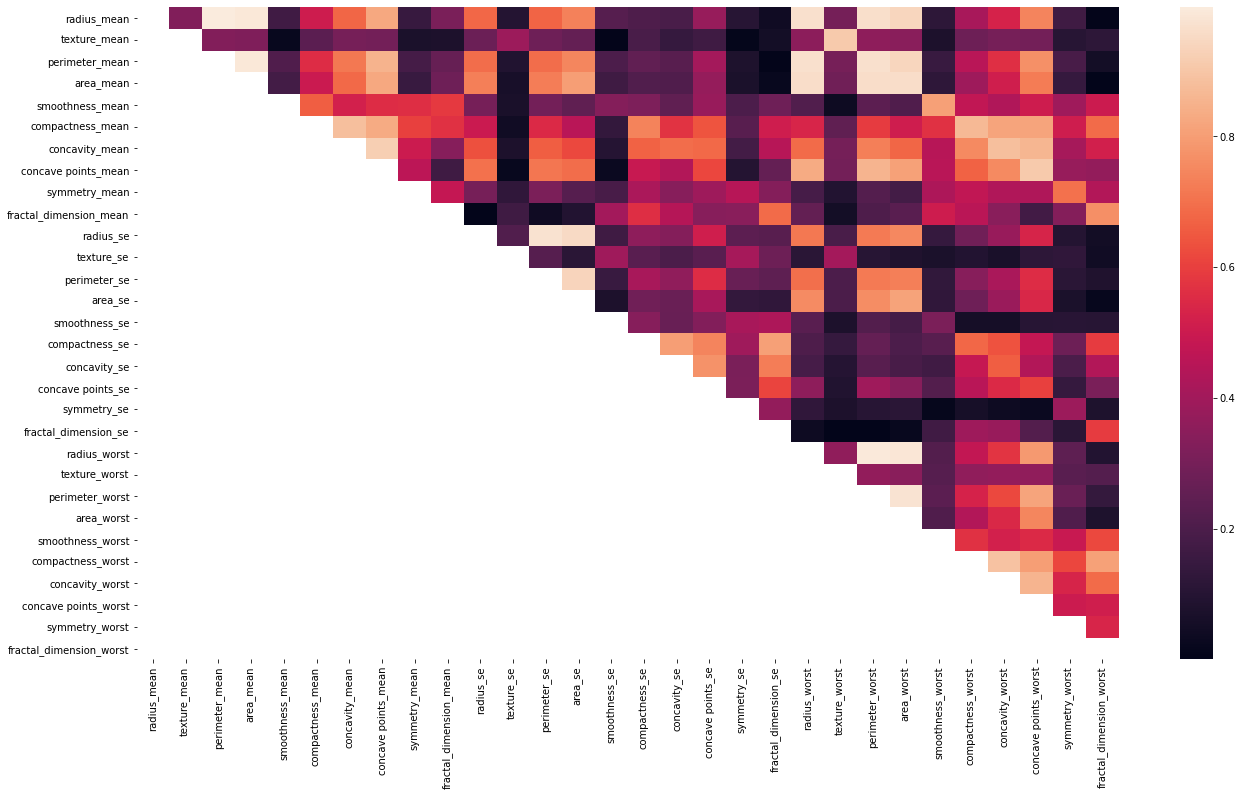

In [311]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
plt.figure(figsize=(22,12))
sns.heatmap(upper_tri,annot=False)

In [312]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)

['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [313]:
data = data.drop(to_drop, axis=1)
display(data.head())

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
842517,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
84300903,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
84348301,M,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
84358402,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [314]:
len(data.columns)

21

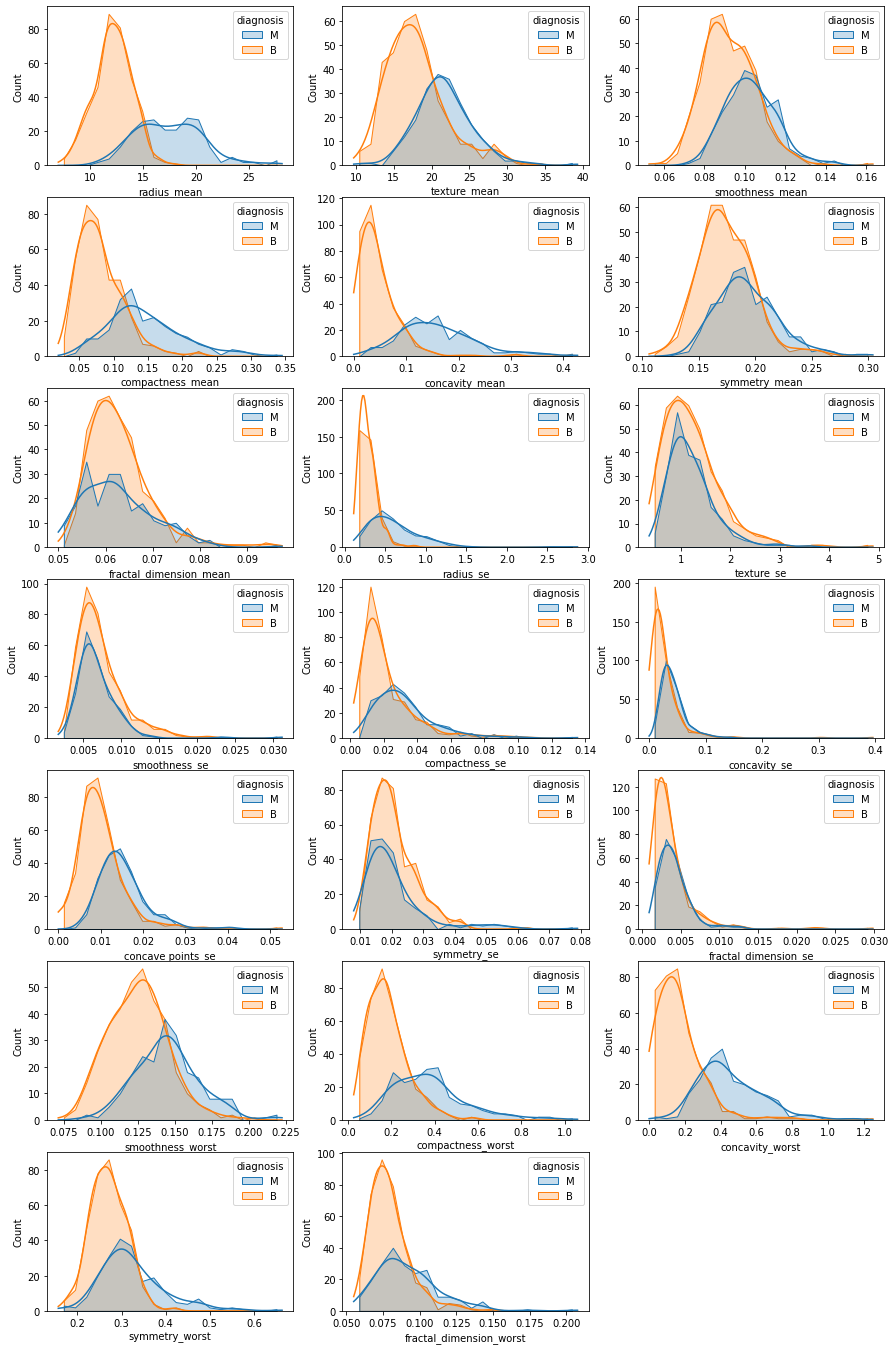

In [315]:
list = data.drop('diagnosis',axis=1).columns
m=1
plt.figure(figsize=(15,24))
for i in list:
    plt.subplot(7,3,m)
    sns.histplot(x=i,data=data,hue='diagnosis',kde=True,element='poly',bins=20)
    m+=1

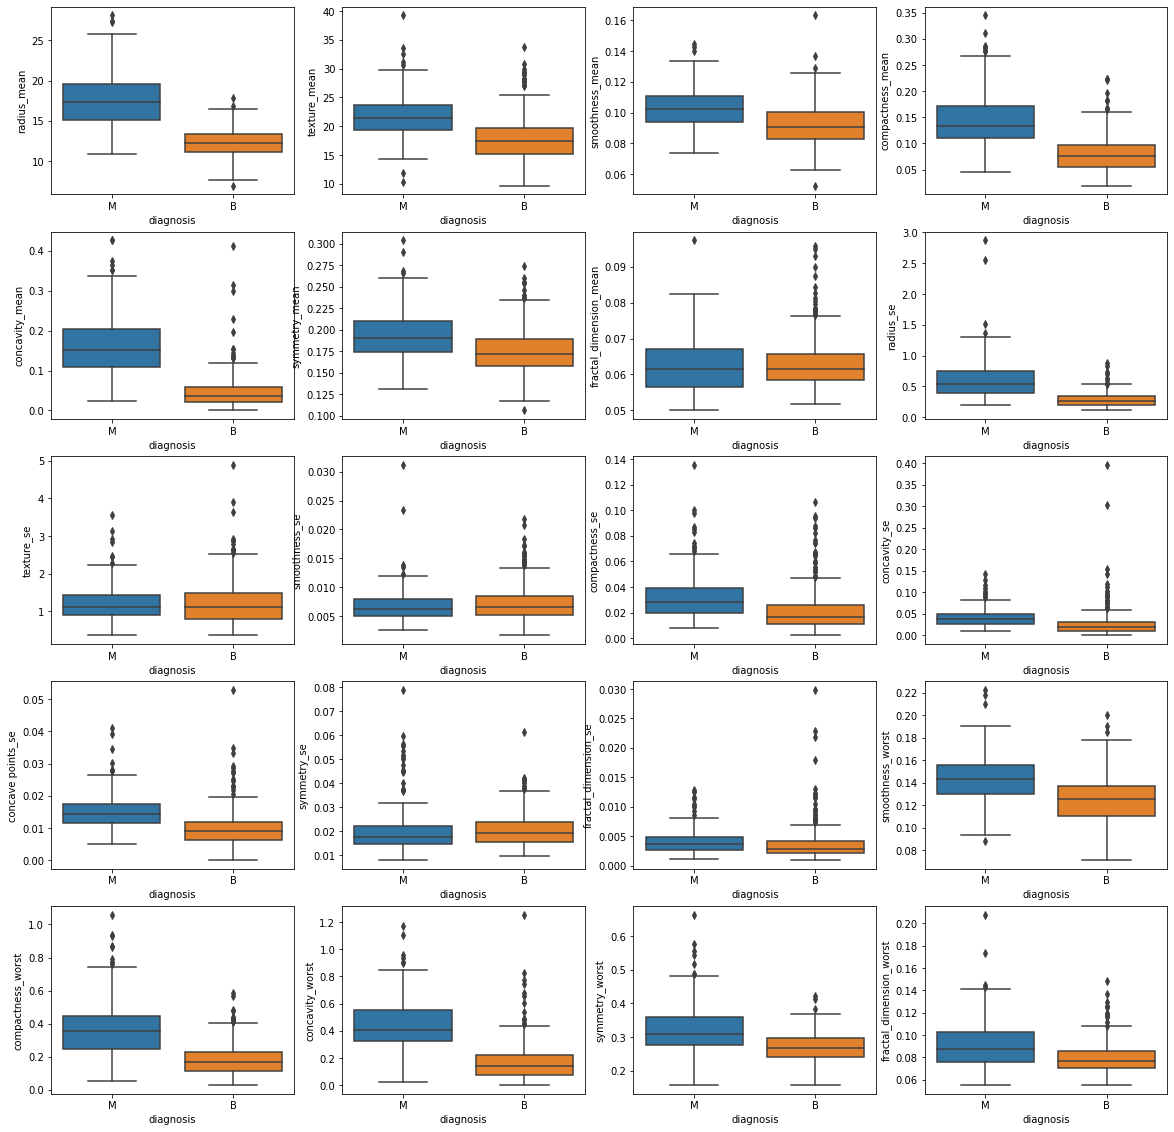

In [316]:
list = data.drop('diagnosis',axis=1).columns
m=1
plt.figure(figsize=(20,20))
for i in list:
    plt.subplot(5,4,m)
    sns.boxplot(y=i,data=data,x='diagnosis')
    m+=1

Removing columns where both diagnosis outcomes have similar distribution and values thus making it difficult to diffrentiate.

In [317]:
data=data.drop(['texture_se','fractal_dimension_se','fractal_dimension_mean'],axis=1)

### One Hot encoding the diagnosis column

In [318]:
from sklearn.preprocessing import LabelEncoder
to_be_encoded = ['diagnosis']
label_encoder = LabelEncoder()
dfs = []
for i in to_be_encoded:
    temp = pd.DataFrame({'Before Encoding':data[i].unique(),'After Encoding':label_encoder.fit_transform(data[i].unique())})
    #dfs.append([temp.sort_values(by=['After Encoding']),i])
    print(i,':')
    display(temp.sort_values(by=['After Encoding']))
    print('\n')
    data[i] = label_encoder.fit_transform(data[i])

diagnosis :


,Before Encoding,After Encoding
1,B,0
0,M,1


## Feature Selection

In [319]:
X = data.drop('diagnosis',axis=1)

Y = data['diagnosis']

## Test Train Split

In [320]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

## Modelling

In [321]:
models_to_test = [stc,bc,gbc,ada,xgb,lr,rfc,knn,svc,mlp]

In [322]:
models = Modelling(X_train,Y_train,X_test,Y_test,models_to_test)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression()) has been fit
BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
[21:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step

In [323]:
models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
best = models['Models'][0]
models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models['Accuracy']=models['Accuracy'].round(5)*100
models

,Models,Accuracy,Runtime (s)
0,AdaBoostClassifier,98.246,0.078790
1,XGBClassifier,97.368,0.040890
2,RandomForestClassifier,97.368,0.154587
3,GradientBoostingClassifier,97.368,0.160539
4,BaggingClassifier,95.614,0.026958
5,StackingClassifier,93.860,0.357044
6,LogisticRegression,92.105,0.019947
7,MLPClassifier,92.105,0.340091
8,KNeighborsClassifier,89.474,0.005984
9,SVC,88.596,0.006981


In [324]:
print('Hence the best model is',models['Models'][0],'with an accuracy of',models['Accuracy'][0],'%')
print('Time taken for training of',models['Models'][0],'is',round((models['Runtime (s)'][0]),2),'seconds')
print('\nThe classification report is:')
print(classification_report(Y_test,best.predict(X_test)))

Hence the best model is AdaBoostClassifier with an accuracy of 98.246 %
Time taken for training of AdaBoostClassifier is 0.08 seconds

The classification report is:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.98      0.98      0.98        49

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

